## 1. Análise exploratória de dados

### 1.1. Carregamento e configuração do ambiente

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
caminho = '../data/processed/dados_limpos.csv'
df_analise = pd.read_csv(caminho)

In [4]:
df_analise.columns

Index(['Unnamed: 0', 'id_procedimento_ambulatorial', 'ano_atendimento',
       'mes_atendimento', 'data_nascimento_paciente', 'idade_paciente',
       'sexo_paciente', 'raca_cor_paciente', 'cid_categoria_geral',
       'municipio_atendimento', 'municipio_residencia',
       'quantidade_atendimentos', 'quantidade_aprovada_procedimento'],
      dtype='object')

In [5]:
df_analise = df_analise.drop(columns=['Unnamed: 0'])

## 2. Análise exploratória

In [6]:
df_analise.head()

,id_procedimento_ambulatorial,ano_atendimento,mes_atendimento,data_nascimento_paciente,idade_paciente,sexo_paciente,raca_cor_paciente,cid_categoria_geral,municipio_atendimento,municipio_residencia,quantidade_atendimentos,quantidade_aprovada_procedimento
0,301080020,2014,1,1959-09-06,54,M,não declarado,F192,Curitiba,Curitiba,1,1
1,301080020,2014,1,1961-01-25,52,M,não declarado,F102,Curitiba,Curitiba,1,1
2,301080020,2014,1,1963-01-31,50,M,não declarado,F102,Curitiba,Curitiba,1,1
3,301080020,2014,1,1965-07-01,48,F,não declarado,F192,Curitiba,Curitiba,1,1
4,301080020,2014,1,1969-05-15,44,F,não declarado,F192,Curitiba,Curitiba,1,1


### 2.1. Variação da demanda ao longo dos últimos 10 anos

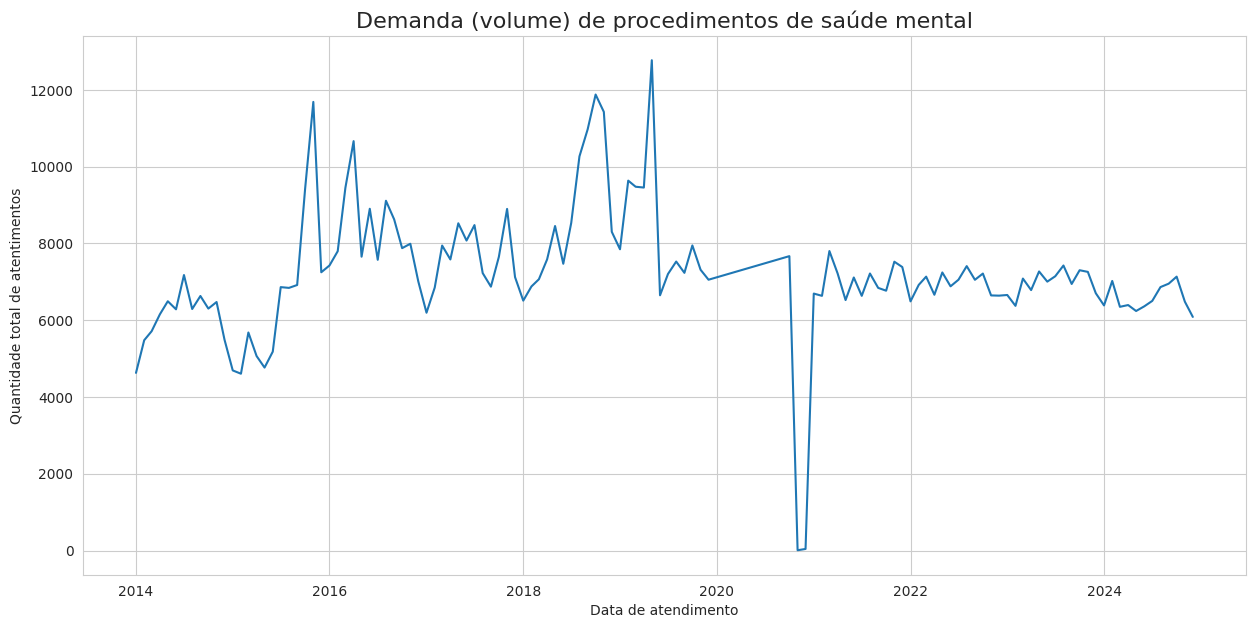

In [22]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

atendimentos_por_mes = df_analise.groupby(['ano_atendimento', 'mes_atendimento'])['quantidade_aprovada_procedimento'].sum().reset_index()
atendimentos_por_mes['data'] = pd.to_datetime(atendimentos_por_mes['ano_atendimento'].astype(str) + '-' + atendimentos_por_mes['mes_atendimento'].astype(str))
sns.lineplot(x='data', y='quantidade_aprovada_procedimento', data=atendimentos_por_mes)
plt.title('Demanda (volume) de procedimentos de saúde mental', fontsize=16)
plt.xlabel('Data de atendimento')
plt.ylabel('Quantidade total de atentimentos')
plt.show()

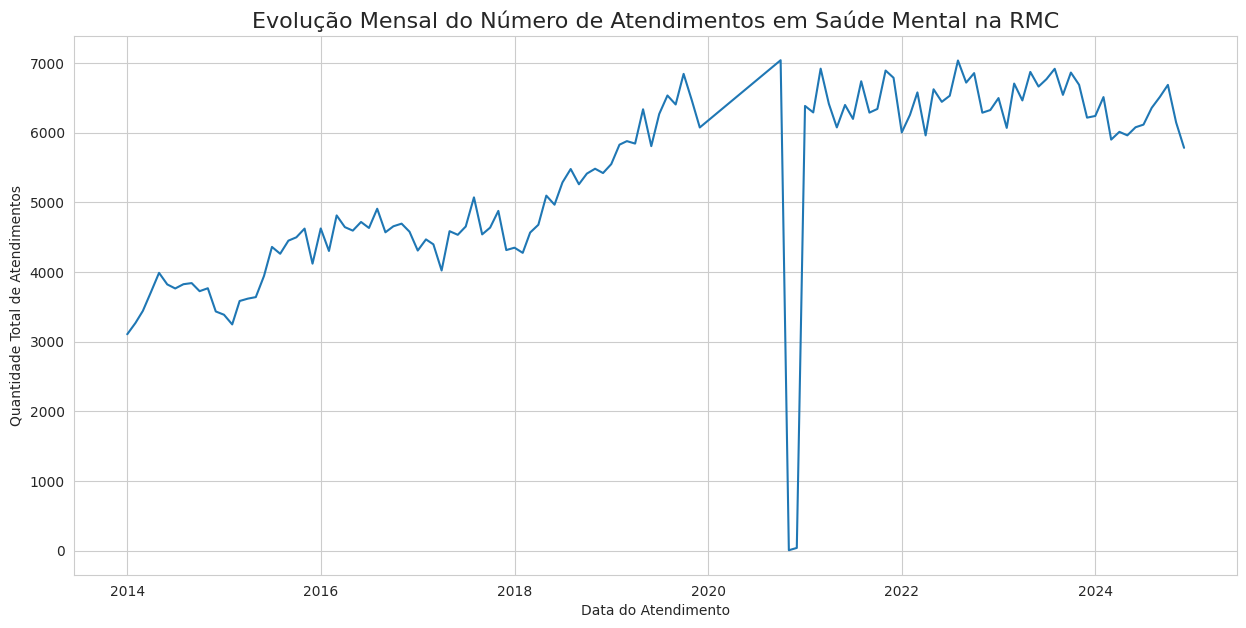

In [19]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

atendimentos_por_mes = df_analise.groupby(['ano_atendimento', 'mes_atendimento'])['quantidade_atendimentos'].sum().reset_index()
atendimentos_por_mes['data'] = pd.to_datetime(atendimentos_por_mes['ano_atendimento'].astype(str) + '-' + atendimentos_por_mes['mes_atendimento'].astype(str))
sns.lineplot(x='data', y='quantidade_atendimentos', data=atendimentos_por_mes)
plt.title('Evolução Mensal do Número de Atendimentos em Saúde Mental na RMC', fontsize=16)
plt.xlabel('Data do Atendimento')
plt.ylabel('Quantidade Total de Atendimentos')
plt.show()

Com a visualização dos dados em gráficos pode-se notar um buraco de atendimentos/procedimentos em alguns meses de 2020. 

Tratamento:

In [ ]:
df_volume = df_analise.groupby(['ano_atendimento', 'mes_atendimento'])['quantidade_aprovada_procedimento'].sum().reset_index()
df_atendimento = df_analise.groupby(['ano_atendimento', 'mes_atendimento'])['quantidade_atendimentos'].sum().reset_index()

print(df_atendimento.sort_values(by='quantidade_aprovada_procedimento').head())
print(df_atendimento.sort_values(by='quantidade_atendimentos').head())

### 2.2. Análises regionais

/tmp/ipykernel_20046/1947894325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_municipios.values, y=top_15_municipios.index, palette='viridis')


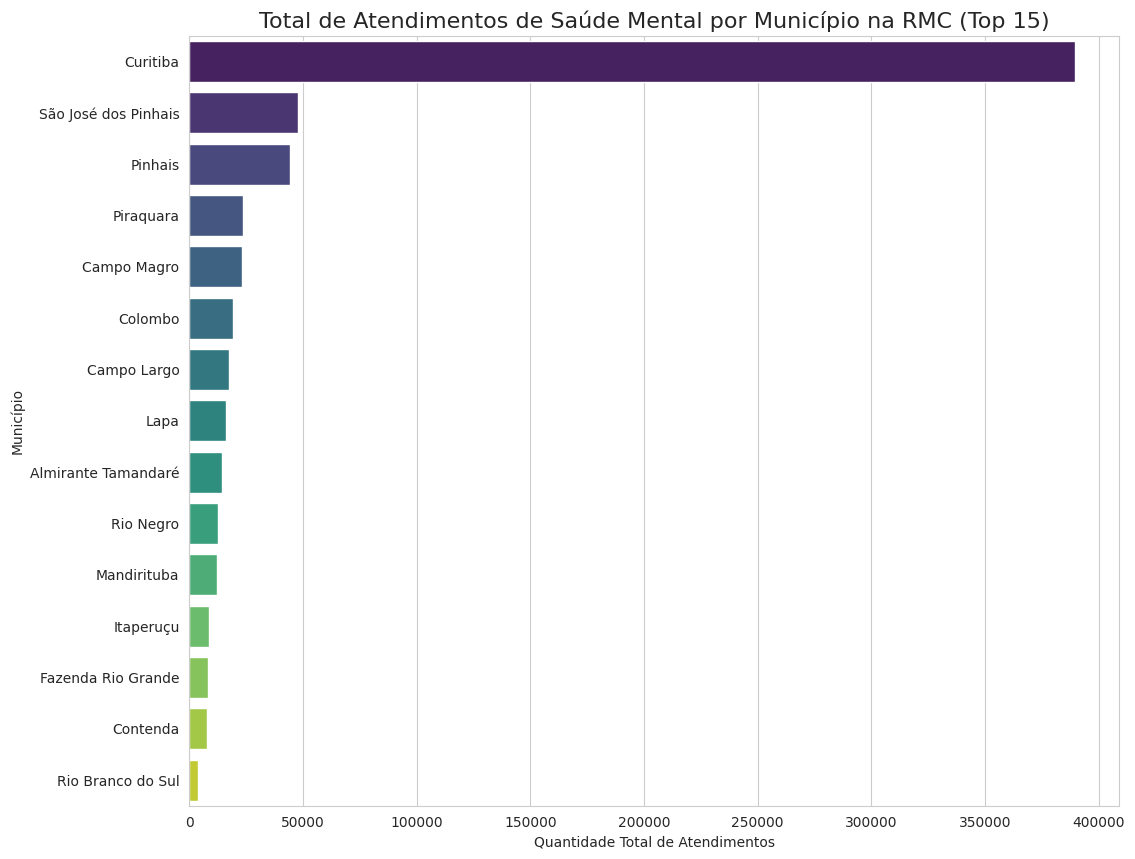

Total de atendimentos por município:
municipio_atendimento
Curitiba                 389516
São José dos Pinhais      47906
Pinhais                   44306
Piraquara                 23480
Campo Magro               23392
Colombo                   19184
Campo Largo               17478
Lapa                      16345
Almirante Tamandaré       14603
Rio Negro                 12673
Mandirituba               12037
Itaperuçu                  8664
Fazenda Rio Grande         8030
Contenda                   7623
Rio Branco do Sul          3649
Quatro Barras              2332
Campina Grande do Sul       527
Name: quantidade_atendimentos, dtype: int64


In [14]:

atendimentos_municipio = df_analise.groupby('municipio_atendimento')['quantidade_atendimentos'].sum().sort_values(ascending=False)

top_15_municipios = atendimentos_municipio.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_15_municipios.values, y=top_15_municipios.index, palette='viridis')

plt.title('Total de Atendimentos de Saúde Mental por Município na RMC (Top 15)', fontsize=16)
plt.xlabel('Quantidade Total de Atendimentos')
plt.ylabel('Município')

plt.show()

print("Total de atendimentos por município:")
print(atendimentos_municipio)